In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# 細々とした処理
fig,ax = plt.figure(),plt.axes(projection="3d")
pi = np.pi
sin = np.sin
cos = np.cos
sqrt = np.sqrt
atan = np.arctan

In [3]:
%matplotlib inline

In [4]:
# 機体パラメータ
A = 150.0
B = 220.0
C = 430.0
D = 100.0

# 最下部中心座標
x = 120.0
y = 80.0
z = -400.0

In [5]:
# 単位ベクトル
angles = np.array([np.pi * (2.0/3.0)*i for i in range(3)])# 原点から肩部への方向を表す角度
unit_vectors = np.array([np.cos(angles),np.sin(angles),np.zeros(3)]).T
ez = np.array([0,0,1])
unit_vectors

array([[ 1.       ,  0.       ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [-0.5      , -0.8660254,  0.       ]])

In [6]:
#thetas = -np.ones(3)*np.pi/4.0

In [7]:
#thetas = np.array([pi/4 for i in range(3)])
thetas = np.zeros((3,))
for i in range(3):
    phi_0 = angles[i]
    # sympyで導出した式

    P = -A**2 + 2*A*D + 2*A*x*cos(phi_0) + 2*A*y*sin(phi_0) - B**2 + C**2 - D**2 - 2*D*x*cos(phi_0) - 2*D*y*sin(phi_0) - x**2 - y**2 - z**2
    Q = -2*B*z
    R = -2*A*B + 2*B*D + 2*B*x*cos(phi_0) + 2*B*y*sin(phi_0)
    theta_0 = -2*atan((Q - sqrt(-P**2 + Q**2 + R**2))/(P - R))
    theta_1 = -2*atan((Q + sqrt(-P**2 + Q**2 + R**2))/(P - R))
    thetas[i] = theta_1 if np.abs(theta_0) > np.abs(theta_1) else theta_0

In [8]:
# 各座標の計算
A_vectors = A * unit_vectors  
B_vectors = np.array([A_vectors[i] + B*( unit_vectors[i] * np.cos(thetas[i])- ez * np.sin(thetas[i]) ) for i in range(3)])
D_vector = np.array([x,y,z])      
C_vectors = D_vector + D * unit_vectors

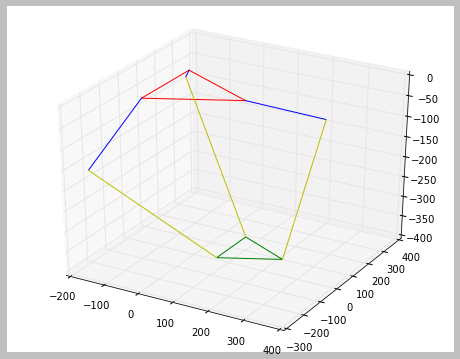

In [9]:
index = np.arange(4) % 3
ax.clear()
ax.plot(xs=A_vectors[index,0],ys=A_vectors[index,1],zs=A_vectors[index,2],color='r')
ax.plot(xs=C_vectors[index,0],ys=C_vectors[index,1],zs=C_vectors[index,2],color='g')
for i in range(3):
    temp = [[A_vectors[i,j],B_vectors[i,j]]for j in range(3)]
    ax.plot(temp[0],temp[1],temp[2],color='b')
for i in range(3):
    temp = [[B_vectors[i,j],C_vectors[i,j]]for j in range(3)]
    ax.plot(temp[0],temp[1],temp[2],color='y')
fig

In [10]:
# 確認
for i in range(3):
    print (np.linalg.norm(B_vectors[i]-C_vectors[i]))
for i in range(3):
    print(np.linalg.norm(B_vectors[i]-A_vectors[i]))

430.0
430.0
430.0
220.0
220.0
220.0
